In [5]:
import pandas as pd

details = r'C:\Users\Admin\Downloads\archive\Details.csv'
orders = r'C:\Users\Admin\Downloads\archive\Orders.csv'

details_df = pd.read_csv(details)
orders_df = pd.read_csv(orders)

details_df.head(), orders_df.head()

(  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
 0  B-25681    1096     658         7  Electronics  Electronic Games   
 1  B-26055    5729      64        14    Furniture            Chairs   
 2  B-25955    2927     146         8    Furniture         Bookcases   
 3  B-26093    2847     712         8  Electronics          Printers   
 4  B-25602    2617    1151         4  Electronics            Phones   
 
    PaymentMode  
 0          COD  
 1          EMI  
 2          EMI  
 3  Credit Card  
 4  Credit Card  ,
   Order ID  Order Date CustomerName           State     City
 0  B-26055  10-03-2018    Harivansh   Uttar Pradesh  Mathura
 1  B-25993  03-02-2018       Madhav           Delhi    Delhi
 2  B-25973  24-01-2018  Madan Mohan   Uttar Pradesh  Mathura
 3  B-25923  27-12-2018        Gopal     Maharashtra   Mumbai
 4  B-25757  21-08-2018     Vishakha  Madhya Pradesh   Indore)

Merge Datasets 

In [8]:
df = pd.merge(details_df, orders_df, on="Order ID")

Total Amount, Total Profit, and Total Quantity KPIs

total_amt = df["Amount"].sum()
total_prft = df["Profit"].sum()
total_qnty = df["Quantity"].sum()

total_amt, total_prft, total_qnty

Visulaize

In [14]:
import matplotlib.pyplot as plt
top_customers = (
    df.groupby("CustomerName")["Amount"].sum().sort_values(ascending=False).head(5)
)

top_cities = (
    df.groupby("City")["Amount"].sum().sort_values(ascending=False).head(5)
)

Top 5 Customers by Spend

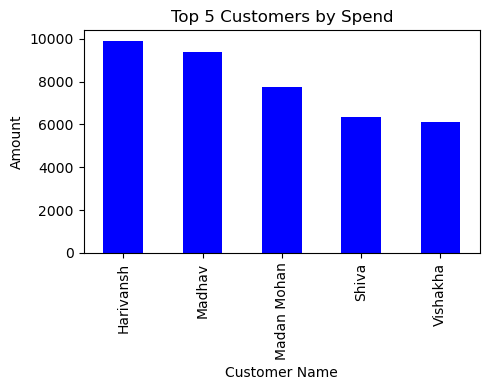

In [27]:
plt.figure(figsize=(5,4))
top_customers.plot(kind="bar",color="blue", title="Top 5 Customers by Spend", ylabel='Amount', xlabel="Customer Name")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top 5 Cities

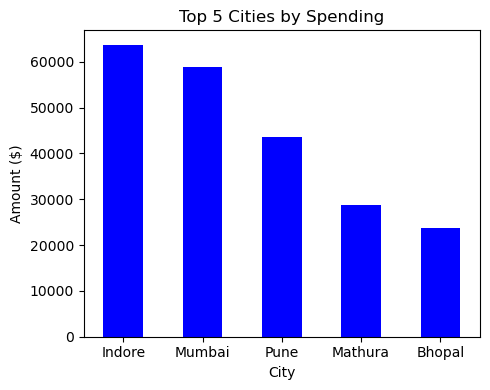

In [29]:
plt.figure(figsize=(5, 4))
top_cities.plot(kind="bar", color="blue", title="Top 5 Cities by Spending", ylabel="Amount ($)", xlabel="City")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Charts

In [33]:
quantity_by_cat = df.groupby("Category")["Quantity"].sum()
paymentmode = df["PaymentMode"].value_counts()

Quantity by category

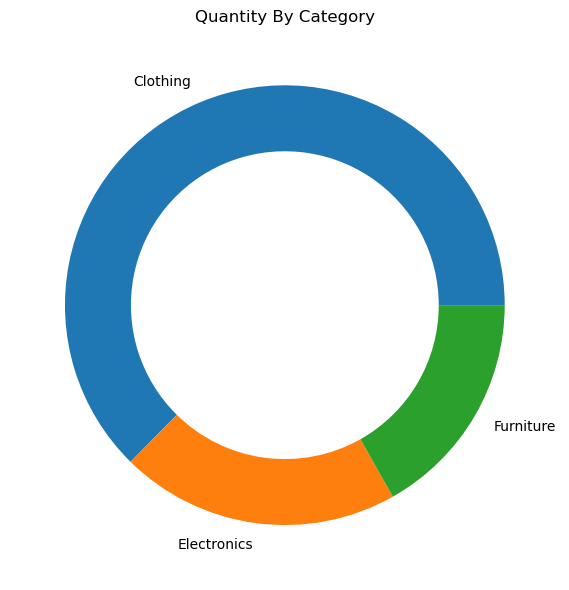

In [41]:
plt.figure(figsize=(6,6))
plt.pie(quantity_by_cat, labels=quantity_by_cat.index, wedgeprops=dict(width=0.3))
plt.title("Quantity By Category")
plt.tight_layout()
plt.show()

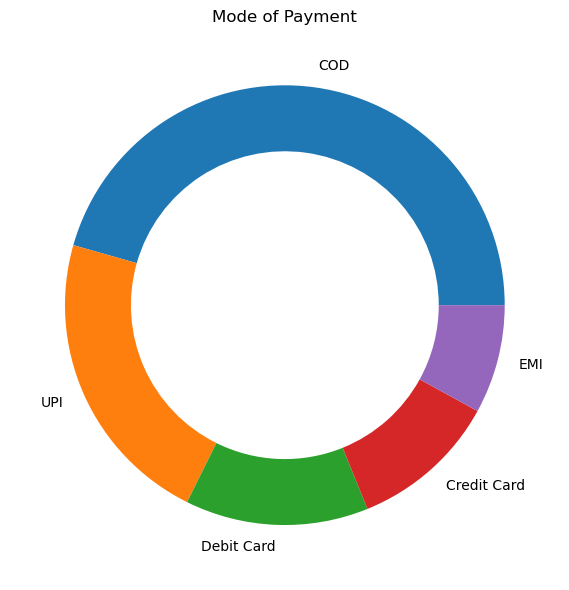

In [42]:
plt.figure(figsize=(6,6))
plt.pie(paymentmode, labels=paymentmode.index, wedgeprops=dict(width=0.3))
plt.title("Mode of Payment")
plt.tight_layout()
plt.show()

Bar Chart

In [43]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")

profit_by_month = (
    df.groupby(df["Order Date"].dt.strftime("%B"))["Profit"].sum()
    .reindex(["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"])
)

profit_by_subcategory = (
    df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(5)
)

Profit by Month (Bar Chart)

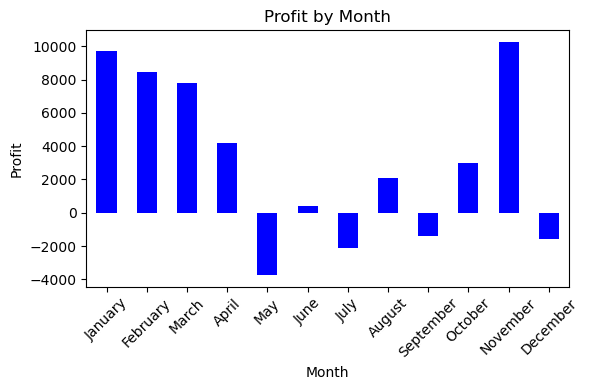

In [49]:
plt.figure(figsize=(6, 4))
profit_by_month.plot(kind="bar", color="blue", title="Profit by Month", ylabel="Profit", xlabel="Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Profit by Subcategory (Bar chart)

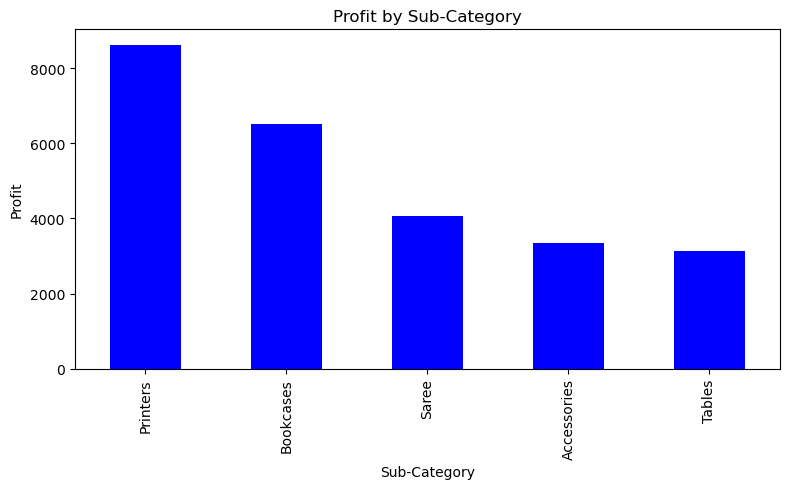

In [48]:
plt.figure(figsize=(8, 5))
profit_by_subcategory.plot(kind="bar", color="blue", title="Profit by Sub-Category", ylabel="Profit", xlabel="Sub-Category")
plt.tight_layout()
plt.show()